# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt

# Problem

- Question

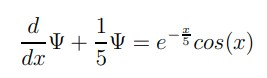

- This is the differential equation problem that we will solve
- boundary condition is y(0) = 0 #A
- x belongs to [0, 2]

- Trial Solution

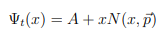

In [2]:
# Boundary Condition
A = 0

In [3]:
# Trial Solution (y_trial) as described in Paper You can see it satisfy given boundary condition i.e y(0) = A , here A = 0
def Y_trial(X):
  return A + X*model(X)

In [4]:
# Model that is universal approximator
model = tf.keras.Sequential([
    InputLayer(input_shape=(1,), dtype=tf.dtypes.float32),
    Dense(64, activation="sigmoid"),
    Dense(1)
])

In [5]:
# This is actual solution of given partial differentila equation will use it later for comparision between predicted and actual
def Y_actual(X):
  return np.exp(-X / 5.0) * np.sin(X)

- Given IVP (inital value problem)


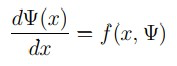

In [6]:
# dy/dx = f(x, y)
def F(X, Y):
  return tf.math.exp(-X/5.0) * tf.math.cos(X) - Y/5.0

In [7]:
# initialising X values that is x belongs to [0, 2]
X = np.linspace(0, 2, 100)

In [8]:
X = tf.cast(tf.expand_dims(X, axis=-1), dtype=tf.float32)

- loss Function
- this loss function we will use for updating weights of model
- loss is calculate by Summantion of (dy_trial/dx - f(x, y_trial))^2 as we have to minimise thise
- **Note** : y_trial approximately equal to y_actual

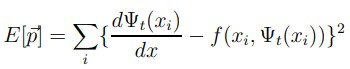


In [9]:
def custom_loss(X):
  with tf.GradientTape() as tape:
    tape.watch(X)
    outputs = Y_trial(X)
  dY_trial_x = tape.gradient(outputs, X)
  return tf.reduce_mean(tf.square(dY_trial_x-F(X, outputs)))

In [10]:
num_epochs = 300

In [11]:
optimizer = tf.keras.optimizers.Adam()

In [12]:
loss_history = []

In [13]:
for i in range(num_epochs):
  with tf.GradientTape() as g:
    g.watch(model.trainable_variables)
    loss = custom_loss(X)
  print(loss)
  loss_history.append(loss.numpy())
  gradients = g.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

tf.Tensor(0.15788503, shape=(), dtype=float32)
tf.Tensor(0.14679635, shape=(), dtype=float32)
tf.Tensor(0.14001004, shape=(), dtype=float32)
tf.Tensor(0.13672355, shape=(), dtype=float32)
tf.Tensor(0.13528815, shape=(), dtype=float32)
tf.Tensor(0.13416983, shape=(), dtype=float32)
tf.Tensor(0.1325227, shape=(), dtype=float32)
tf.Tensor(0.1301215, shape=(), dtype=float32)
tf.Tensor(0.12709183, shape=(), dtype=float32)
tf.Tensor(0.1236952, shape=(), dtype=float32)
tf.Tensor(0.12020455, shape=(), dtype=float32)
tf.Tensor(0.11683939, shape=(), dtype=float32)
tf.Tensor(0.11373431, shape=(), dtype=float32)
tf.Tensor(0.11092965, shape=(), dtype=float32)
tf.Tensor(0.108381264, shape=(), dtype=float32)
tf.Tensor(0.105988674, shape=(), dtype=float32)
tf.Tensor(0.103634484, shape=(), dtype=float32)
tf.Tensor(0.10122283, shape=(), dtype=float32)
tf.Tensor(0.0987043, shape=(), dtype=float32)
tf.Tensor(0.09608126, shape=(), dtype=float32)
tf.Tensor(0.09339676, shape=(), dtype=float32)
tf.Tensor(0.09

In [14]:
y_true = Y_actual(X)

In [15]:
y_pred = Y_trial(X)

- Visualisation of Predicted Vs Actual

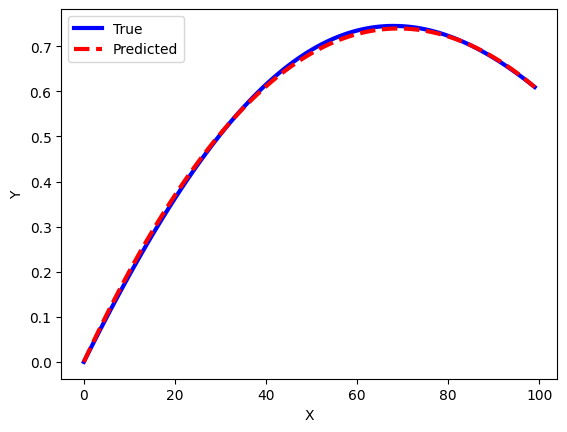

In [25]:
plt.plot(y_true, c="blue", linewidth=3)
plt.plot(y_pred, c="red", linewidth=3, linestyle="--")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["True", "Predicted"])

- Loss

Text(0, 0.5, 'Loss')

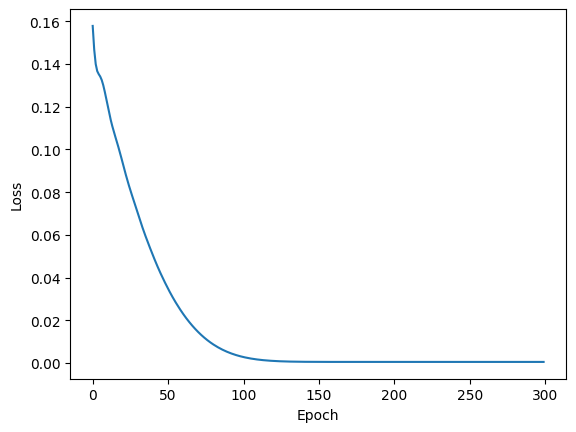

In [26]:
plt.plot(loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")